In [985]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn


In [986]:
df = pd.read_csv('adult.csv')
df.head()



,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [987]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [988]:
# Count occurrences of '?' in each column
question_marks = (df == '?').sum()
print("Number of '?' values in each column:")
print(question_marks)


Number of '?' values in each column:
age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


In [989]:

# Remove rows containing '?' in any column
df = df[~df.isin(['?']).any(axis=1)]
print("\nDataset shape after removing rows with '?':", df.shape)



Dataset shape after removing rows with '?': (45222, 15)


In [990]:
categorical_columns = df.select_dtypes(include=['object']).columns




In [991]:
from sklearn.preprocessing import LabelEncoder
df[categorical_columns] = df[categorical_columns].apply(LabelEncoder().fit_transform)

In [992]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0


In [993]:

from sklearn.preprocessing import StandardScaler
columns_to_normalize = ['fnlwgt']
scaler = StandardScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,0.350889,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,-0.945878,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,1.393592,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,-0.278420,15,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,0.084802,0,6,4,7,1,4,1,0,0,30,38,0


In [994]:
# Create age ranges and hours ranges as before, but use LabelEncoder
def categorize_age(age):
    if age < 25: return '18-24'
    elif age < 35: return '25-34'
    elif age < 45: return '35-44'
    elif age < 55: return '45-54'
    elif age < 65: return '55-64'
    else: return '65+'

def categorize_hours(hours):
    if hours < 20: return 'Part-time (<20)'
    elif hours < 40: return 'Part-time (20-39)'
    elif hours == 40: return 'Full-time (40)'
    elif hours < 60: return 'Overtime (41-60)'
    else: return 'Extended (>60)'

# Apply categorization
df['age'] = df['age'].apply(categorize_age)
df['hours-per-week'] = df['hours-per-week'].apply(categorize_hours)

# Label encode both columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['age'] = le.fit_transform(df['age'])
df['hours-per-week'] = le.fit_transform(df['hours-per-week'])

In [995]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,2,0.350889,1,7,4,6,3,2,1,0,0,1,38,0
1,2,2,-0.945878,11,9,2,4,0,4,1,0,0,2,38,0
2,1,1,1.393592,7,12,2,10,0,4,1,0,0,1,38,1
3,2,2,-0.278420,15,10,2,6,0,2,1,7688,0,1,38,1
5,1,2,0.084802,0,6,4,7,1,4,1,0,0,3,38,0


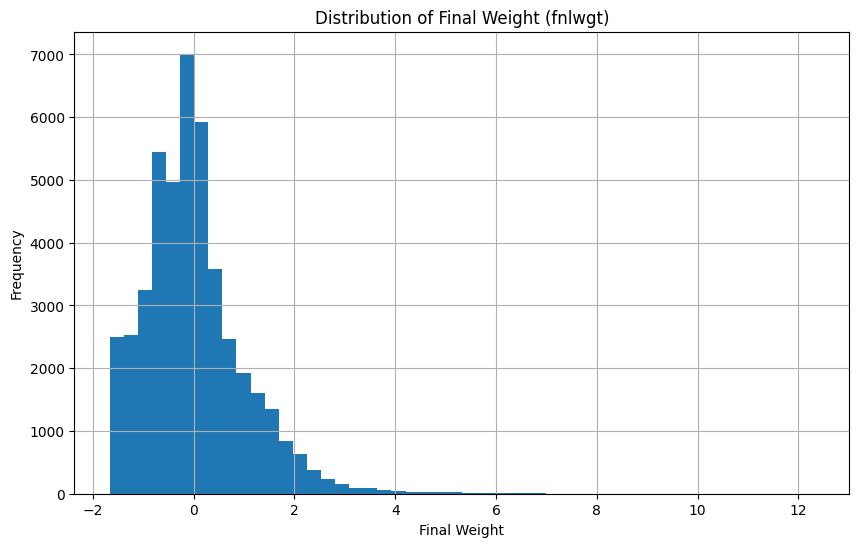

In [996]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['fnlwgt'], bins=50)
plt.title('Distribution of Final Weight (fnlwgt)')
plt.xlabel('Final Weight')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [997]:
df['fnlwgt'] = df['fnlwgt'].apply(lambda x: np.log2(x + 1))



/tmp/ipykernel_9699/1513480991.py:1: RuntimeWarning: invalid value encountered in log2
  df['fnlwgt'] = df['fnlwgt'].apply(lambda x: np.log2(x + 1))


In [998]:
plt.figure(figsize=(10, 6))
plt.hist(df['fnlwgt'], bins=50)
plt.title('Distribution of Final Weight (fnlwgt)')
plt.xlabel('Final Weight')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,2,0.433910,1,7,4,6,3,2,1,0,0,1,38,0
1,2,2,-4.207653,11,9,2,4,0,4,1,0,0,2,38,0
2,1,1,1.259177,7,12,2,10,0,4,1,0,0,1,38,1
3,2,2,-0.470769,15,10,2,6,0,2,1,7688,0,1,38,1
5,1,2,0.117431,0,6,4,7,1,4,1,0,0,3,38,0


Capital Gain Statistics:
capital-gain
0        41432
15024      498
7688       391
7298       351
99999      229
Name: count, dtype: int64

Percentage of non-zero capital gains: 8.380876564504003 %

Capital Loss Statistics:
capital-loss
0       43082
1902      294
1977      246
1887      228
2415       68
Name: count, dtype: int64

Percentage of non-zero capital losses: 4.73220998628986 %


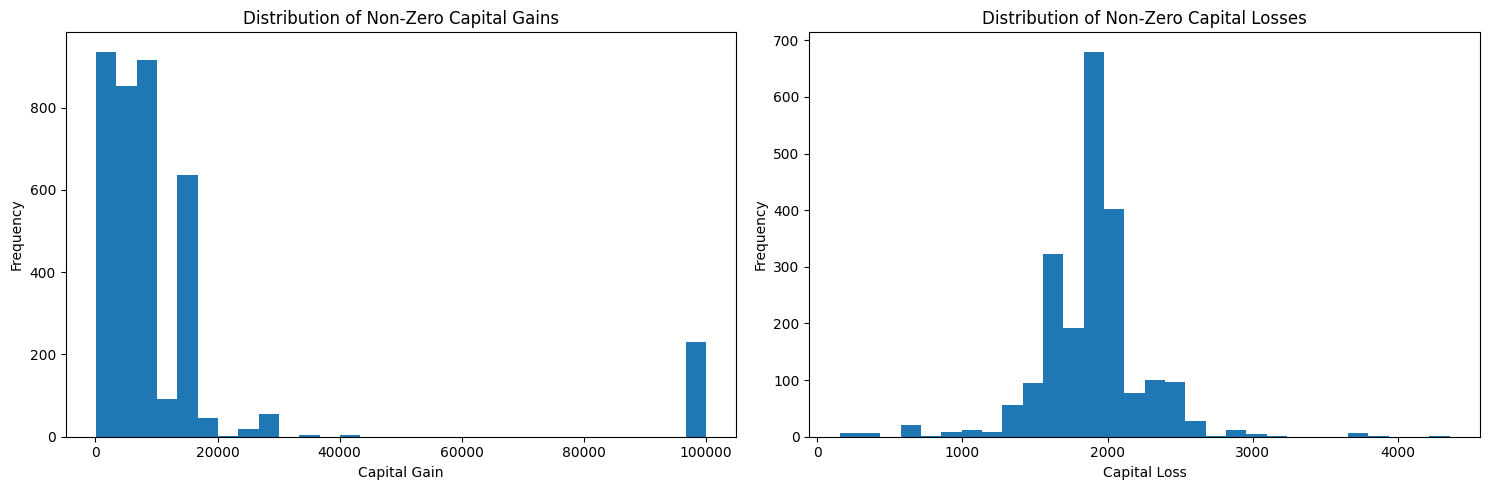


Correlation with income:
Capital Gain: 0.22103380635452013
Capital Loss: 0.14868698924704843


In [ ]:
# Analyze capital gain and loss
print("Capital Gain Statistics:")
print(df['capital-gain'].value_counts().head())
print("\nPercentage of non-zero capital gains:", 
      (df['capital-gain'] != 0).mean() * 100, "%")

print("\nCapital Loss Statistics:")
print(df['capital-loss'].value_counts().head())
print("\nPercentage of non-zero capital losses:", 
      (df['capital-loss'] != 0).mean() * 100, "%")

# Visualize their distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(df[df['capital-gain'] > 0]['capital-gain'], bins=30)
plt.title('Distribution of Non-Zero Capital Gains')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df[df['capital-loss'] > 0]['capital-loss'], bins=30)
plt.title('Distribution of Non-Zero Capital Losses')
plt.xlabel('Capital Loss')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Check their correlation with income
print("\nCorrelation with income:")
print("Capital Gain:", df['capital-gain'].corr(df['income']))
print("Capital Loss:", df['capital-loss'].corr(df['income']))

In [ ]:
# Option 1: Binary indicators
df['has_capital_gain'] = (df['capital-gain'] > 0).astype(int)
df['has_capital_loss'] = (df['capital-loss'] > 0).astype(int)
df = df.drop(['capital-gain', 'capital-loss'], axis=1)


In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,has_capital_gain,has_capital_loss
0,1,2,0.433910,1,7,4,6,3,2,1,1,38,0,0,0
1,2,2,-4.207653,11,9,2,4,0,4,1,2,38,0,0,0
2,1,1,1.259177,7,12,2,10,0,4,1,1,38,1,0,0
3,2,2,-0.470769,15,10,2,6,0,2,1,1,38,1,1,0
5,1,2,0.117431,0,6,4,7,1,4,1,3,38,0,0,0


In [ ]:
df.drop(['fnlwgt'], axis=1, inplace=True)

In [ ]:
X = df.drop('income', axis=1)
y = df['income']




In [ ]:

X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32)



In [ ]:
X.shape

torch.Size([45222, 13])

In [ ]:
y.shape

torch.Size([45222])

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
from sklearn.model_selection import train_test_split
torch.manual_seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape



(torch.Size([36177, 13]),
 torch.Size([9045, 13]),
 torch.Size([36177]),
 torch.Size([9045]))

In [ ]:
class adultIncomeClassifier(nn.Module):
    def __init__(self, input_features):
        super().__init__()
        self.layer_1 = nn.Linear(input_features, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.layer_2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.layer_3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.layer_4 = nn.Linear(64, 32)
        self.bn4 = nn.BatchNorm1d(32)
        self.layer_5 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
    def forward(self, x):
        z = self.relu(self.bn1(self.layer_1(x)))
        z = self.dropout(z)
        z = self.relu(self.bn2(self.layer_2(z)))
        z = self.dropout(z)
        z = self.relu(self.bn3(self.layer_3(z)))
        z = self.dropout(z)
        z = self.relu(self.bn4(self.layer_4(z)))
        z = self.dropout(z)
        z = self.layer_5(z)

        return z

model = adultIncomeClassifier(input_features=X_train.shape[1]).to(device)

In [ ]:
model.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.2120,  0.2302, -0.0650,  ...,  0.2411,  0.0519,  0.2049],
                      [ 0.0376,  0.1337, -0.0392,  ...,  0.1840, -0.2189, -0.1279],
                      [-0.0783, -0.1668,  0.0262,  ...,  0.0432,  0.2241,  0.0303],
                      ...,
                      [ 0.1126, -0.0836, -0.0778,  ..., -0.1909, -0.1348, -0.2118],
                      [ 0.0559, -0.1645, -0.0794,  ...,  0.1516, -0.0059, -0.1585],
                      [-0.1258,  0.0706,  0.0577,  ..., -0.1183, -0.1538, -0.2250]],
                     device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.2732, -0.2533,  0.2578, -0.2180, -0.0673, -0.1136, -0.1485,  0.0986,
                       0.1608, -0.1822, -0.1292,  0.1416, -0.0335,  0.0675,  0.1450, -0.1025,
                      -0.1539,  0.1021, -0.1016, -0.1846, -0.1399, -0.1290,  0.2762,  0.0533,
                       0.1194,  0.0373, -0.1870,  0.2001, -0.0431, -0.0718,  0.2260,

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

for epoch in range(epochs):
    model.train()
    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.6657 | Acc: 61.27% | Test Loss: 0.6165 | Test Acc: 74.98%
Epoch: 100 | Loss: 0.3085 | Acc: 85.31% | Test Loss: 0.3487 | Test Acc: 83.87%
Epoch: 200 | Loss: 0.2911 | Acc: 86.02% | Test Loss: 0.3831 | Test Acc: 82.68%
Epoch: 300 | Loss: 0.2599 | Acc: 87.32% | Test Loss: 0.4760 | Test Acc: 80.93%
Epoch: 400 | Loss: 0.2245 | Acc: 88.95% | Test Loss: 0.5582 | Test Acc: 82.45%
Epoch: 500 | Loss: 0.2068 | Acc: 89.79% | Test Loss: 0.5335 | Test Acc: 82.27%
Epoch: 600 | Loss: 0.2169 | Acc: 89.48% | Test Loss: 0.7206 | Test Acc: 80.30%
Epoch: 700 | Loss: 0.1767 | Acc: 91.14% | Test Loss: 0.7067 | Test Acc: 80.92%
Epoch: 800 | Loss: 0.1688 | Acc: 91.50% | Test Loss: 0.7708 | Test Acc: 81.04%
Epoch: 900 | Loss: 0.1699 | Acc: 91.37% | Test Loss: 0.8779 | Test Acc: 81.28%
